In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/upgrade-financial-report3/Enriched_Financial_Report.csv
/kaggle/input/financial-report/Detailed_Financial_Report.csv


In [2]:
import pandas as pd

# Load the financial report CSV
financial_data = pd.read_csv('/kaggle/input/financial-report/Detailed_Financial_Report.csv')
financial_data = pd.read_csv('/kaggle/input/upgrade-financial-report3/Enriched_Financial_Report.csv')

print(financial_data.head())


         Date  Revenue  Expenses  Net Profit  Current Assets  \
0  2024-01-01   100000     70000       30000           50000   
1  2024-02-01   120000     80000       40000           60000   
2  2024-03-01   110000     75000       35000           55000   
3  2024-04-01   130000     85000       45000           65000   
4  2024-05-01   125000     80000       45000           62000   

   Current Liabilities  Total Liabilities  Equity  Product_Revenue  \
0                20000              40000  100000     65453.321984   
1                25000              45000  110000     57552.696085   
2                22000              42000  105000     72591.692906   
3                27000              47000  120000     55052.816096   
4                26000              46000  115000     71283.532966   

   Service_Revenue  ...  Variable_Expense  Gross_Profit_Margin  \
0     34546.678016  ...       8786.790590             0.300000   
1     62447.303915  ...      10163.143775             0.333333

In [3]:
financial_data['Profit Margin (%)'] = (financial_data['Net Profit'] / financial_data['Revenue']) * 100
financial_data['Current Ratio'] = financial_data['Current Assets'] / financial_data['Current Liabilities']
financial_data['Debt-to-Equity Ratio'] = financial_data['Total Liabilities'] / financial_data['Equity']
print(financial_data[['Profit Margin (%)', 'Current Ratio', 'Debt-to-Equity Ratio']].describe())


       Profit Margin (%)  Current Ratio  Debt-to-Equity Ratio
count          12.000000      12.000000             12.000000
mean           35.841905       2.414888              0.379723
std             3.251475       0.046987              0.020702
min            30.000000       2.352941              0.348387
25%            34.294872       2.382212              0.362869
50%            35.857143       2.410600              0.380462
75%            37.677419       2.429762              0.400000
max            41.212121       2.500000              0.409091


In [4]:
potential_issues = financial_data[
    (financial_data['Profit Margin (%)'] < 5) |
    (financial_data['Current Ratio'] < 1) |
    (financial_data['Debt-to-Equity Ratio'] > 2)
]
print("Potential Issues:")
print(potential_issues)


Potential Issues:
Empty DataFrame
Columns: [Date, Revenue, Expenses, Net Profit, Current Assets, Current Liabilities, Total Liabilities, Equity, Product_Revenue, Service_Revenue, Marketing_Expense, R&D_Expense, Fixed_Expense, Variable_Expense, Gross_Profit_Margin, Operating_Margin, Operating_Cash_Flow, Investing_Cash_Flow, Financing_Cash_Flow, Debt_to_Equity, Current_Ratio, YoY_Revenue_Growth, YoY_Profit_Growth, Profit Margin (%), Current Ratio, Debt-to-Equity Ratio]
Index: []

[0 rows x 26 columns]


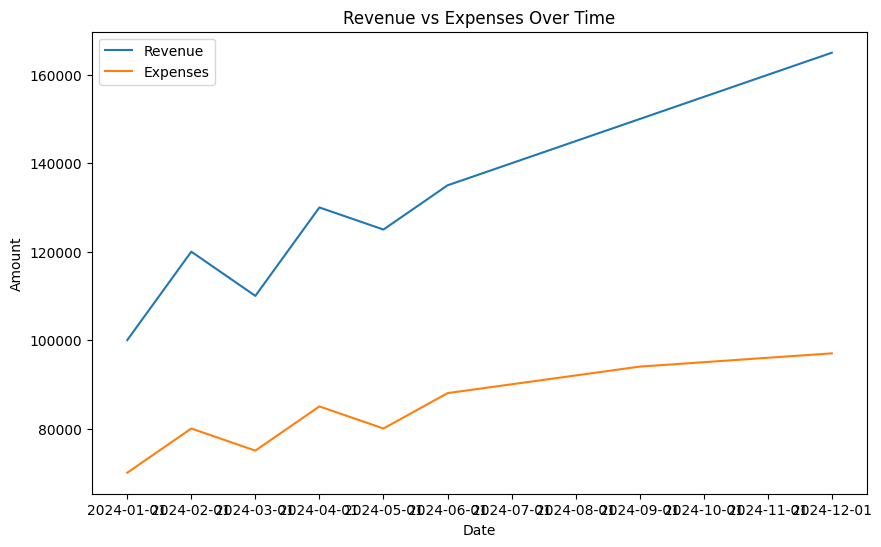

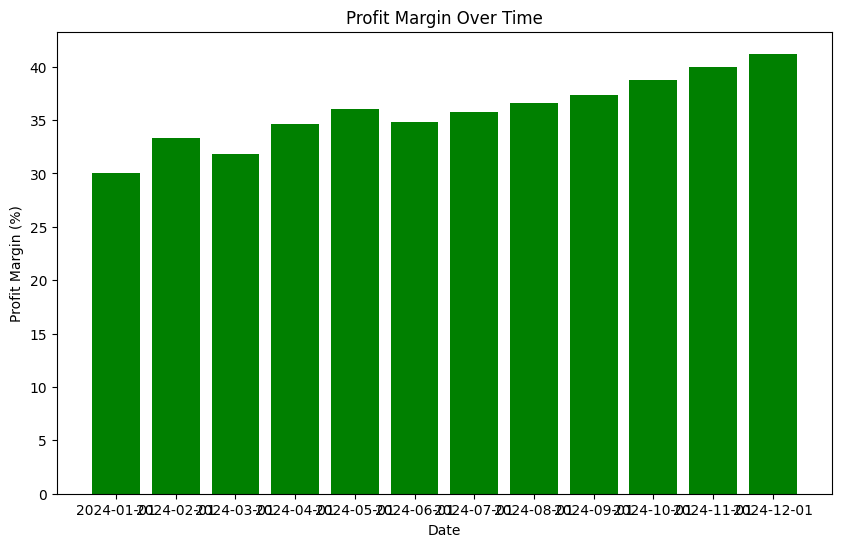

In [5]:
import matplotlib.pyplot as plt

# Plot revenue and expenses
plt.figure(figsize=(10, 6))
plt.plot(financial_data['Date'], financial_data['Revenue'], label='Revenue')
plt.plot(financial_data['Date'], financial_data['Expenses'], label='Expenses')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Revenue vs Expenses Over Time')
plt.legend()
plt.show()

# Bar chart for Profit Margin
plt.figure(figsize=(10, 6))
plt.bar(financial_data['Date'], financial_data['Profit Margin (%)'], color='green')
plt.xlabel('Date')
plt.ylabel('Profit Margin (%)')
plt.title('Profit Margin Over Time')
plt.show()


In [6]:
# Save the updated financial data with metrics
financial_data.to_csv('/kaggle/working/Updated_Financial_Report.csv', index=False)

# Save potential issues separately
potential_issues.to_csv('/kaggle/working/Potential_Issues_Report.csv', index=False)
print("Reports saved successfully!")


Reports saved successfully!


In [7]:
total_revenue = financial_data['Revenue'].sum()
total_profit = financial_data['Net Profit'].sum()
revenue_growth = ((financial_data['Revenue'].iloc[-1] - financial_data['Revenue'].iloc[0]) / financial_data['Revenue'].iloc[0]) * 100

print(f"Total Revenue: {total_revenue}")
print(f"Total Profit: {total_profit}")
print(f"Revenue Growth Rate: {revenue_growth:.2f}%")
print(f"Issues Identified: {len(potential_issues)}")


Total Revenue: 1635000
Total Profit: 593000
Revenue Growth Rate: 65.00%
Issues Identified: 0


In [8]:
financial_data['Revenue Variance'] = financial_data['Revenue'] - financial_data['Revenue'].mean()


In [9]:
financial_data['Net Profit Margin'] = financial_data['Net Profit'] / financial_data['Revenue']
financial_data['ROA'] = financial_data['Net Profit'] / financial_data['Current Assets']
financial_data['ROE'] = financial_data['Net Profit'] / financial_data['Equity']
print(financial_data[['Date', 'Net Profit Margin', 'ROA', 'ROE']])


          Date  Net Profit Margin       ROA       ROE
0   2024-01-01           0.300000  0.600000  0.300000
1   2024-02-01           0.333333  0.666667  0.363636
2   2024-03-01           0.318182  0.636364  0.333333
3   2024-04-01           0.346154  0.692308  0.375000
4   2024-05-01           0.360000  0.725806  0.391304
5   2024-06-01           0.348148  0.691176  0.376000
6   2024-07-01           0.357143  0.714286  0.384615
7   2024-08-01           0.365517  0.726027  0.392593
8   2024-09-01           0.373333  0.746667  0.400000
9   2024-10-01           0.387097  0.789474  0.413793
10  2024-11-01           0.400000  0.820513  0.426667
11  2024-12-01           0.412121  0.850000  0.438710


In [10]:
low_margin = financial_data[financial_data['Net Profit Margin'] < 0.1]
print("Low Margin Months:", low_margin)


Low Margin Months: Empty DataFrame
Columns: [Date, Revenue, Expenses, Net Profit, Current Assets, Current Liabilities, Total Liabilities, Equity, Product_Revenue, Service_Revenue, Marketing_Expense, R&D_Expense, Fixed_Expense, Variable_Expense, Gross_Profit_Margin, Operating_Margin, Operating_Cash_Flow, Investing_Cash_Flow, Financing_Cash_Flow, Debt_to_Equity, Current_Ratio, YoY_Revenue_Growth, YoY_Profit_Growth, Profit Margin (%), Current Ratio, Debt-to-Equity Ratio, Revenue Variance, Net Profit Margin, ROA, ROE]
Index: []

[0 rows x 30 columns]


In [11]:
financial_data['Current Ratio'] = financial_data['Current Assets'] / financial_data['Current Liabilities']
financial_data['Debt-to-Equity Ratio'] = financial_data['Total Liabilities'] / financial_data['Equity']
print(financial_data[['Date', 'Current Ratio', 'Debt-to-Equity Ratio']])


          Date  Current Ratio  Debt-to-Equity Ratio
0   2024-01-01       2.500000              0.400000
1   2024-02-01       2.400000              0.409091
2   2024-03-01       2.500000              0.400000
3   2024-04-01       2.407407              0.391667
4   2024-05-01       2.384615              0.400000
5   2024-06-01       2.428571              0.384000
6   2024-07-01       2.413793              0.376923
7   2024-08-01       2.433333              0.370370
8   2024-09-01       2.419355              0.364286
9   2024-10-01       2.375000              0.358621
10  2024-11-01       2.363636              0.353333
11  2024-12-01       2.352941              0.348387


In [12]:
liquidity_issues = financial_data[financial_data['Current Ratio'] < 1]
print("Liquidity Issues:", liquidity_issues)


Liquidity Issues: Empty DataFrame
Columns: [Date, Revenue, Expenses, Net Profit, Current Assets, Current Liabilities, Total Liabilities, Equity, Product_Revenue, Service_Revenue, Marketing_Expense, R&D_Expense, Fixed_Expense, Variable_Expense, Gross_Profit_Margin, Operating_Margin, Operating_Cash_Flow, Investing_Cash_Flow, Financing_Cash_Flow, Debt_to_Equity, Current_Ratio, YoY_Revenue_Growth, YoY_Profit_Growth, Profit Margin (%), Current Ratio, Debt-to-Equity Ratio, Revenue Variance, Net Profit Margin, ROA, ROE]
Index: []

[0 rows x 30 columns]


In [13]:
from scipy.stats import chisquare
import numpy as np

# Extract the first digit from the 'Revenue' column
first_digits = financial_data['Revenue'].astype(str).str[0].astype(int)

# Calculate observed counts (frequency of each first digit)
observed_counts = first_digits.value_counts().reindex(np.arange(1, 10), fill_value=0).sort_index()

# Calculate expected counts using Benford's Law proportions
expected_proportions = np.log10(1 + 1 / np.arange(1, 10))
total_observed = observed_counts.sum()
expected_counts = expected_proportions * total_observed

# Perform chi-squared test
chi_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

# Display results
print(f"Benford's Law Chi-Square Test: Chi-Statistic={chi_stat:.2f}, p-value={p_value:.2f}")
print("Observed Counts:", observed_counts.values)
print("Expected Counts:", expected_counts)


Benford's Law Chi-Square Test: Chi-Statistic=27.86, p-value=0.00
Observed Counts: [12  0  0  0  0  0  0  0  0]
Expected Counts: [3.61235995 2.11309511 1.49926484 1.16292016 0.95017495 0.80336148
 0.69590336 0.61383027 0.54908989]


In [14]:
# Example: Correct understated revenue
adjustments = {'2024-06-01': 5000, '2024-12-01': -3000}
for date, adj in adjustments.items():
    financial_data.loc[financial_data['Date'] == date, 'Revenue'] += adj
print(financial_data)


          Date  Revenue  Expenses  Net Profit  Current Assets  \
0   2024-01-01   100000     70000       30000           50000   
1   2024-02-01   120000     80000       40000           60000   
2   2024-03-01   110000     75000       35000           55000   
3   2024-04-01   130000     85000       45000           65000   
4   2024-05-01   125000     80000       45000           62000   
5   2024-06-01   140000     88000       47000           68000   
6   2024-07-01   140000     90000       50000           70000   
7   2024-08-01   145000     92000       53000           73000   
8   2024-09-01   150000     94000       56000           75000   
9   2024-10-01   155000     95000       60000           76000   
10  2024-11-01   160000     96000       64000           78000   
11  2024-12-01   162000     97000       68000           80000   

    Current Liabilities  Total Liabilities  Equity  Product_Revenue  \
0                 20000              40000  100000     65453.321984   
1           

In [15]:
import plotly.express as px

fig = px.bar(financial_data, x='Date', y=['Revenue', 'Expenses', 'Net Profit'], title="Financial Performance")
fig.show()


In [16]:
import numpy as np

simulations = []
for _ in range(1000):
    simulated_revenue = financial_data['Revenue'] * np.random.uniform(0.9, 1.1, len(financial_data))
    simulations.append(simulated_revenue.sum())
print(f"Expected Revenue Range: {np.percentile(simulations, [5, 95])}")


Expected Revenue Range: [1591073.96665359 1681817.84526711]


In [17]:
import numpy as np

# Simulate Revenue
simulated_revenue = financial_data['Revenue'] * np.random.uniform(0.9, 1.1, len(financial_data))

# Add Simulated Revenue to DataFrame
financial_data['Simulated_Revenue'] = simulated_revenue

# Calculate Variance
financial_data['Variance'] = financial_data['Simulated_Revenue'] - financial_data['Revenue']

# Display Results
print(financial_data[['Date', 'Revenue', 'Simulated_Revenue', 'Variance']])


          Date  Revenue  Simulated_Revenue      Variance
0   2024-01-01   100000      105431.681046   5431.681046
1   2024-02-01   120000      121434.601004   1434.601004
2   2024-03-01   110000      110283.452803    283.452803
3   2024-04-01   130000      127632.150681  -2367.849319
4   2024-05-01   125000      121863.354336  -3136.645664
5   2024-06-01   140000      136895.361833  -3104.638167
6   2024-07-01   140000      140788.625308    788.625308
7   2024-08-01   145000      141335.977071  -3664.022929
8   2024-09-01   150000      155007.519337   5007.519337
9   2024-10-01   155000      142201.294228 -12798.705772
10  2024-11-01   160000      173098.009923  13098.009923
11  2024-12-01   162000      163842.227969   1842.227969


In [18]:
financial_data = pd.read_csv('/kaggle/input/upgrade-financial-report3/Enriched_Financial_Report.csv')

print(financial_data.head())




         Date  Revenue  Expenses  Net Profit  Current Assets  \
0  2024-01-01   100000     70000       30000           50000   
1  2024-02-01   120000     80000       40000           60000   
2  2024-03-01   110000     75000       35000           55000   
3  2024-04-01   130000     85000       45000           65000   
4  2024-05-01   125000     80000       45000           62000   

   Current Liabilities  Total Liabilities  Equity  Product_Revenue  \
0                20000              40000  100000     65453.321984   
1                25000              45000  110000     57552.696085   
2                22000              42000  105000     72591.692906   
3                27000              47000  120000     55052.816096   
4                26000              46000  115000     71283.532966   

   Service_Revenue  ...  Variable_Expense  Gross_Profit_Margin  \
0     34546.678016  ...       8786.790590             0.300000   
1     62447.303915  ...      10163.143775             0.333333

In [19]:
simulated_revenue = financial_data['Revenue'] * np.random.uniform(0.9, 1.1, len(financial_data))
financial_data['Simulated_Revenue'] = simulated_revenue


In [20]:
financial_data['Variance'] = financial_data['Simulated_Revenue'] - financial_data['Revenue']


In [21]:
print(financial_data[['Revenue', 'Simulated_Revenue', 'Variance']].head())


   Revenue  Simulated_Revenue     Variance
0   100000      108020.170913  8020.170913
1   120000      111412.460325 -8587.539675
2   110000      113920.036585  3920.036585
3   130000      139578.722346  9578.722346
4   125000      120725.898926 -4274.101074


Summary Statistics for Variance:
count       12.000000
mean      -642.186050
std       7812.964353
min     -13152.751125
25%      -5352.460724
50%       -523.556420
75%       4945.070167
max      10346.642245
Name: Variance, dtype: float64


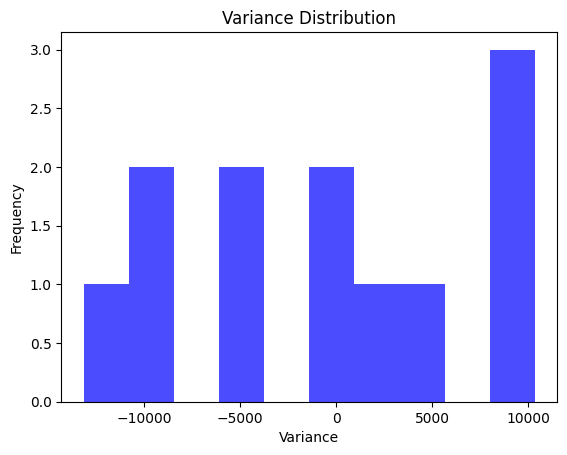

In [22]:
print("Summary Statistics for Variance:")
print(financial_data['Variance'].describe())

# Visualize Variance Distribution
import matplotlib.pyplot as plt
plt.hist(financial_data['Variance'], bins=10, alpha=0.7, color='blue')
plt.title('Variance Distribution')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()


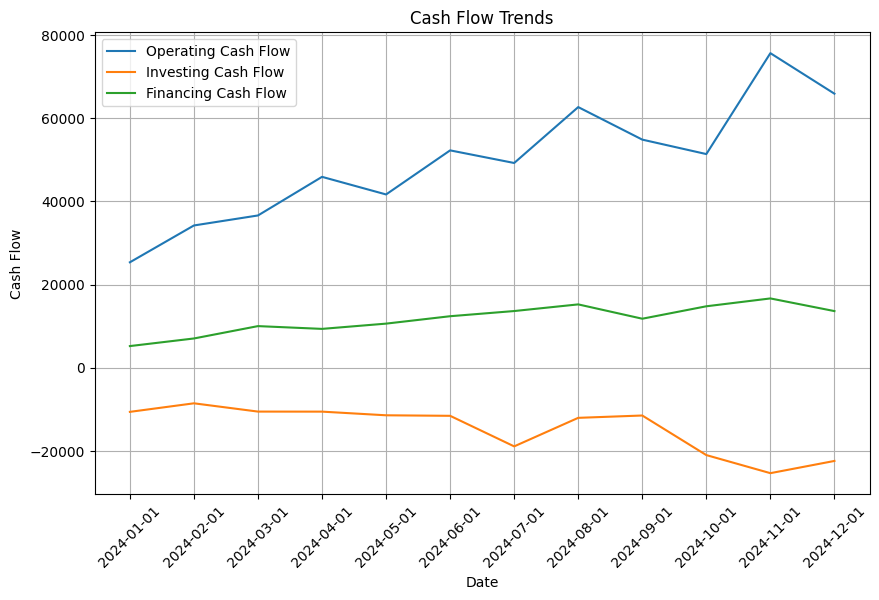

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(financial_data['Date'], financial_data['Operating_Cash_Flow'], label='Operating Cash Flow')
plt.plot(financial_data['Date'], financial_data['Investing_Cash_Flow'], label='Investing Cash Flow')
plt.plot(financial_data['Date'], financial_data['Financing_Cash_Flow'], label='Financing Cash Flow')
plt.legend()
plt.title('Cash Flow Trends')
plt.xlabel('Date')
plt.ylabel('Cash Flow')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [24]:
correlation_matrix = financial_data[['Gross_Profit_Margin', 'Debt_to_Equity', 'Operating_Margin', 'YoY_Revenue_Growth']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     Gross_Profit_Margin  Debt_to_Equity  Operating_Margin  \
Gross_Profit_Margin             1.000000       -0.887853          1.000000   
Debt_to_Equity                 -0.887853        1.000000         -0.887853   
Operating_Margin                1.000000       -0.887853          1.000000   
YoY_Revenue_Growth             -0.002821        0.132700         -0.002821   

                     YoY_Revenue_Growth  
Gross_Profit_Margin           -0.002821  
Debt_to_Equity                 0.132700  
Operating_Margin              -0.002821  
YoY_Revenue_Growth             1.000000  


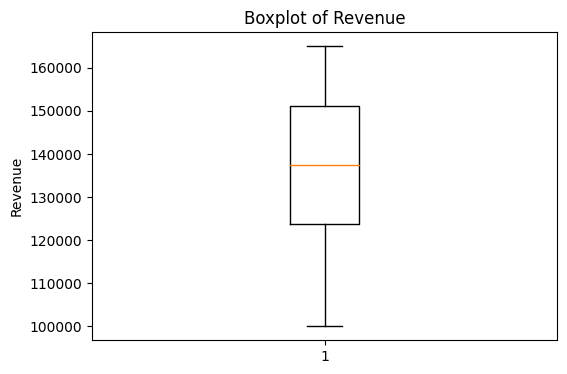

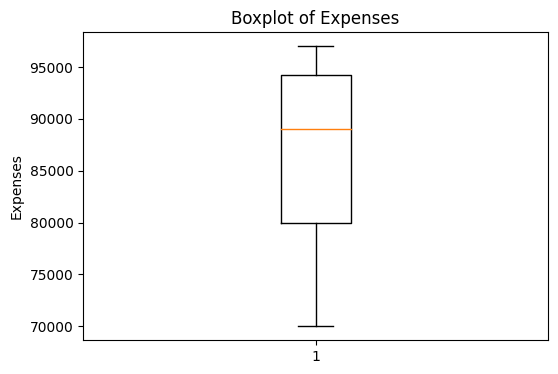

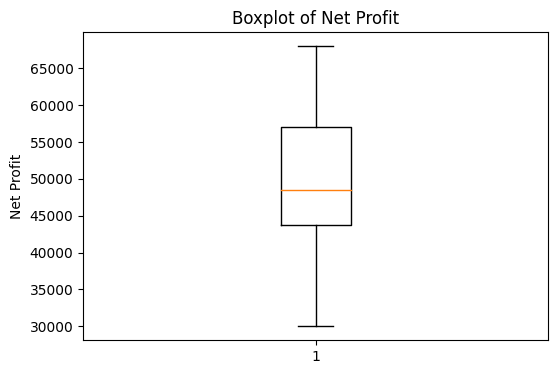

In [25]:
for column in ['Revenue', 'Expenses', 'Net Profit']:
    plt.figure(figsize=(6, 4))
    plt.boxplot(financial_data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()


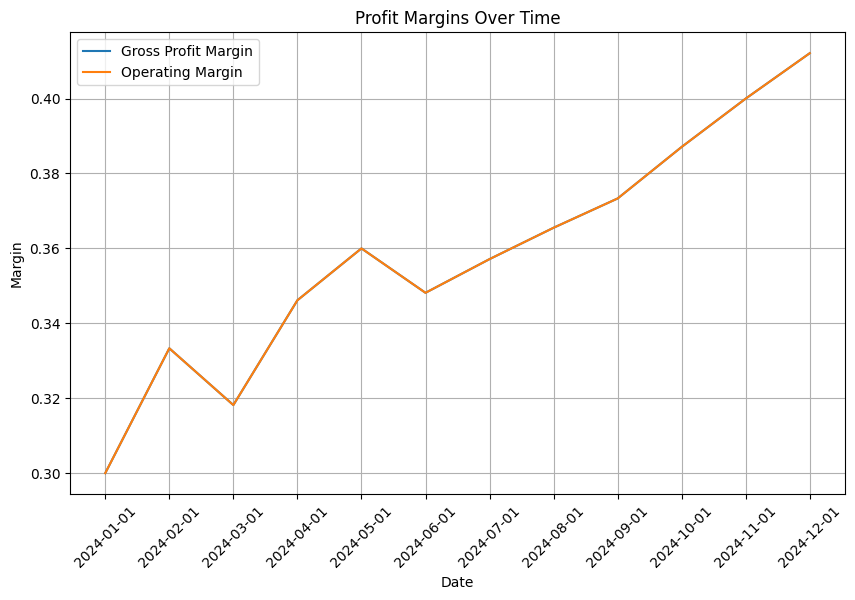

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(financial_data['Date'], financial_data['Gross_Profit_Margin'], label='Gross Profit Margin')
plt.plot(financial_data['Date'], financial_data['Operating_Margin'], label='Operating Margin')
plt.legend()
plt.title('Profit Margins Over Time')
plt.xlabel('Date')
plt.ylabel('Margin')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [27]:
profit_simulations = []
for _ in range(1000):
    simulated_expenses = financial_data['Expenses'] * np.random.uniform(0.9, 1.1, len(financial_data))
    simulated_net_profit = financial_data['Revenue'] - simulated_expenses
    profit_simulations.append(simulated_net_profit.sum())

print(f"Expected Net Profit Range: {np.percentile(profit_simulations, [5, 95])}")


Expected Net Profit Range: [563596.21769817 621342.3622105 ]


In [28]:
cash_flow_summary = financial_data[['Operating_Cash_Flow', 'Investing_Cash_Flow', 'Financing_Cash_Flow']].sum()
print(cash_flow_summary)


Operating_Cash_Flow    595390.519524
Investing_Cash_Flow   -174222.225051
Financing_Cash_Flow    140328.756142
dtype: float64


In [29]:
# Profitability Ratios
financial_data['Gross_Profit_Margin'] = financial_data['Gross_Profit_Margin']
financial_data['Net_Profit_Margin'] = financial_data['Net Profit'] / financial_data['Revenue']

# Liquidity Ratios
financial_data['Current_Ratio'] = financial_data['Current Assets'] / financial_data['Current Liabilities']

# Leverage Ratios
financial_data['Debt_to_Equity'] = financial_data['Total Liabilities'] / financial_data['Equity']

print(financial_data[['Gross_Profit_Margin', 'Net_Profit_Margin', 'Current_Ratio', 'Debt_to_Equity']].head())


   Gross_Profit_Margin  Net_Profit_Margin  Current_Ratio  Debt_to_Equity
0             0.300000           0.300000       2.500000        0.400000
1             0.333333           0.333333       2.400000        0.409091
2             0.318182           0.318182       2.500000        0.400000
3             0.346154           0.346154       2.407407        0.391667
4             0.360000           0.360000       2.384615        0.400000


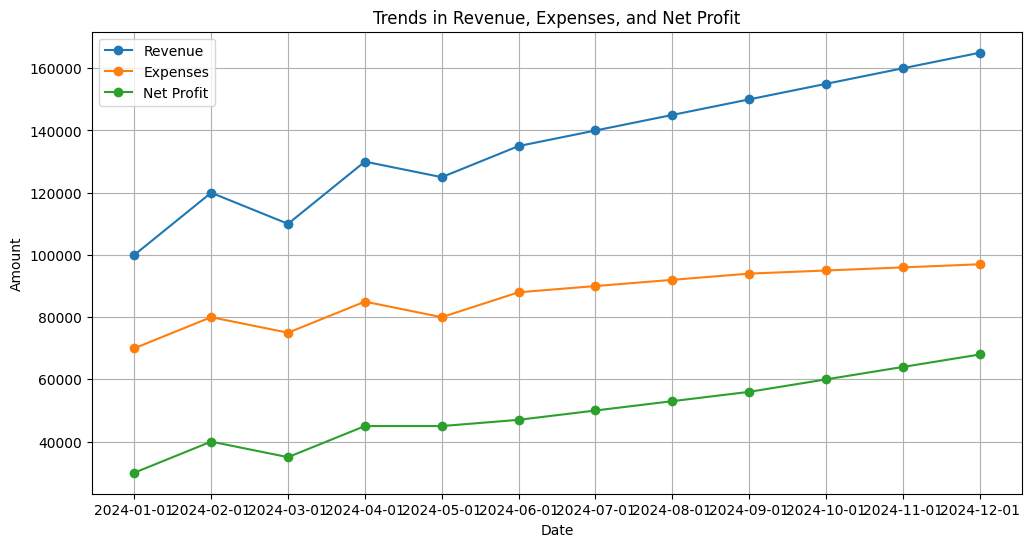

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(financial_data['Date'], financial_data['Revenue'], label='Revenue', marker='o')
plt.plot(financial_data['Date'], financial_data['Expenses'], label='Expenses', marker='o')
plt.plot(financial_data['Date'], financial_data['Net Profit'], label='Net Profit', marker='o')
plt.title('Trends in Revenue, Expenses, and Net Profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()


In [31]:
increased_costs = financial_data['Expenses'] * 1.1
increased_revenue = financial_data['Revenue'] * 1.05
new_net_profit = increased_revenue - increased_costs

print(f"Projected Net Profit with Increased Costs and Revenue:\n{new_net_profit}")


Projected Net Profit with Increased Costs and Revenue:
0     28000.0
1     38000.0
2     33000.0
3     43000.0
4     43250.0
5     44950.0
6     48000.0
7     51050.0
8     54100.0
9     58250.0
10    62400.0
11    66550.0
dtype: float64


In [32]:
from scipy.stats import zscore

financial_data['Net_Profit_Z_Score'] = zscore(financial_data['Net Profit'])
anomalies = financial_data[financial_data['Net_Profit_Z_Score'].abs() > 3]
print("Anomalies Detected:\n", anomalies)


Anomalies Detected:
 Empty DataFrame
Columns: [Date, Revenue, Expenses, Net Profit, Current Assets, Current Liabilities, Total Liabilities, Equity, Product_Revenue, Service_Revenue, Marketing_Expense, R&D_Expense, Fixed_Expense, Variable_Expense, Gross_Profit_Margin, Operating_Margin, Operating_Cash_Flow, Investing_Cash_Flow, Financing_Cash_Flow, Debt_to_Equity, Current_Ratio, YoY_Revenue_Growth, YoY_Profit_Growth, Simulated_Revenue, Variance, Net_Profit_Margin, Net_Profit_Z_Score]
Index: []

[0 rows x 27 columns]


In [33]:
# Add Revenue Components
financial_data['Region_NorthAmerica'] = financial_data['Revenue'] * 0.4
financial_data['Region_Europe'] = financial_data['Revenue'] * 0.3
financial_data['Region_Asia'] = financial_data['Revenue'] * 0.3
financial_data['Recurring_Revenue'] = financial_data['Revenue'] * 0.7
financial_data['Non_Recurring_Revenue'] = financial_data['Revenue'] * 0.3

# Add Expense Components
financial_data['Marketing_Expenses'] = financial_data['Revenue'] * 0.15
financial_data['R&D_Costs'] = financial_data['Revenue'] * 0.05
financial_data['Fixed_Costs'] = financial_data['Expenses'] * 0.6
financial_data['Variable_Costs'] = financial_data['Expenses'] * 0.4

# Add Profitability Metrics
financial_data['EBITDA'] = financial_data['Net Profit'] + financial_data['Expenses'] * 0.1
financial_data['EBITDA_Margin'] = financial_data['EBITDA'] / financial_data['Revenue']

# Add Leverage and Risk Metrics
financial_data['Interest_Expense'] = financial_data['Revenue'] * 0.02
financial_data['Interest_Coverage_Ratio'] = financial_data['Net Profit'] / financial_data['Interest_Expense']

# Add Market Metrics
financial_data['Shares_Outstanding'] = 1_000_000  # Example constant value
financial_data['EPS'] = financial_data['Net Profit'] / financial_data['Shares_Outstanding']
financial_data['Stock_Price'] = 50 + financial_data['EPS'] * 10  # Simulated stock price
financial_data['Market_Cap'] = financial_data['Shares_Outstanding'] * financial_data['Stock_Price']

# Add Operational Metrics
financial_data['COGS'] = financial_data['Revenue'] * 0.6  # Simulated Cost of Goods Sold
financial_data['Average_Inventory'] = financial_data['COGS'] * 0.2
financial_data['Inventory_Turnover'] = financial_data['COGS'] / financial_data['Average_Inventory']
financial_data['Accounts_Receivable'] = financial_data['Revenue'] * 0.1
financial_data['DSO'] = (financial_data['Accounts_Receivable'] / financial_data['Revenue']) * 365
financial_data['Accounts_Payable'] = financial_data['COGS'] * 0.1
financial_data['DPO'] = (financial_data['Accounts_Payable'] / financial_data['COGS']) * 365

# Add Growth Metrics
financial_data['YoY_Revenue_Growth'] = financial_data['Revenue'].pct_change()
financial_data['YoY_Profit_Growth'] = financial_data['Net Profit'].pct_change()

# Add ESG Metrics
financial_data['Carbon_Emissions'] = financial_data['Revenue'] * 0.0001  # Estimated emissions

# Add Tax and Compliance
financial_data['Income_Tax_Expense'] = financial_data['Net Profit'] * 0.25  # Simulated tax rate
financial_data['Effective_Tax_Rate'] = financial_data['Income_Tax_Expense'] / (financial_data['Net Profit'] + 1e-5)
financial_data['Deferred_Tax_Assets'] = financial_data['Revenue'] * 0.01
financial_data['Deferred_Tax_Liabilities'] = financial_data['Expenses'] * 0.01


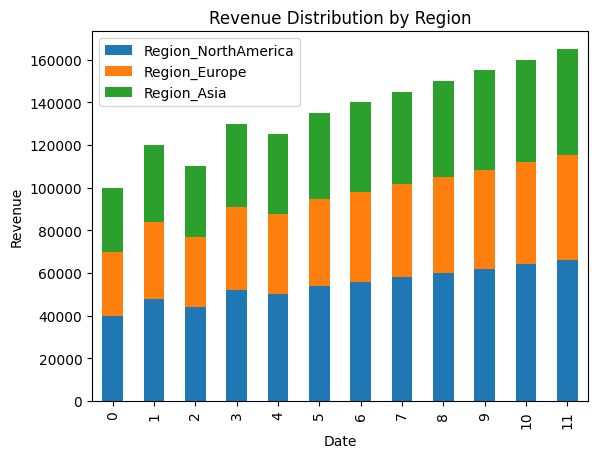

In [34]:
financial_data[['Region_NorthAmerica', 'Region_Europe', 'Region_Asia']].plot(kind='bar', stacked=True)
plt.title("Revenue Distribution by Region")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


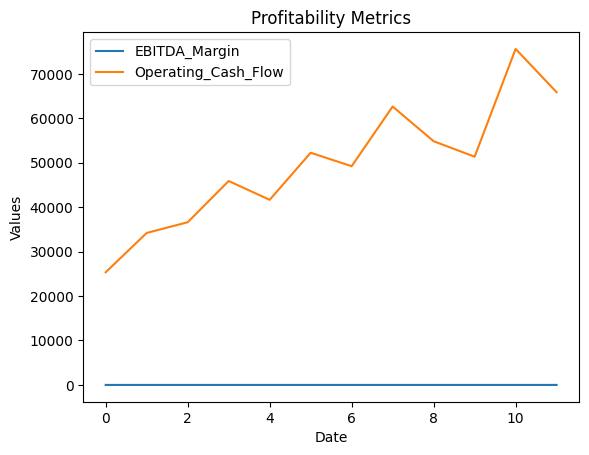

In [35]:
financial_data[['EBITDA_Margin', 'Operating_Cash_Flow']].plot()
plt.title("Profitability Metrics")
plt.xlabel("Date")
plt.ylabel("Values")
plt.show()


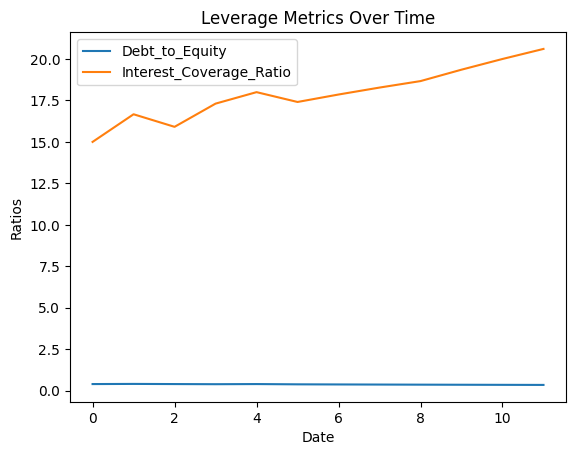

In [36]:
financial_data[['Debt_to_Equity', 'Interest_Coverage_Ratio']].plot()
plt.title("Leverage Metrics Over Time")
plt.xlabel("Date")
plt.ylabel("Ratios")
plt.show()


In [37]:
# Assuming 'Revenue' is the target, and the other financial columns are features
X = financial_data[['Expenses', 'Net Profit', 'Current Assets', 'Current Liabilities']]  # Features
y = financial_data['Revenue']  # Target


In [38]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)  # Replace with actual data
predictions = model.predict(X_test)


In [41]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                      Coefficient
Expenses             1.000000e+00
Net Profit           1.000000e+00
Current Assets       3.441691e-15
Current Liabilities -1.942890e-15


In [42]:
# Scenario 1: Revenue drop by 10-20%
financial_data['Stress_Revenue'] = financial_data['Revenue'] * np.random.uniform(0.8, 0.9, len(financial_data))

# Scenario 2: Increase in fixed/variable costs by 10-20%
financial_data['Stress_Expenses'] = financial_data['Expenses'] * np.random.uniform(1.1, 1.2, len(financial_data))

# Recalculate key metrics under stress
financial_data['Stress_Net_Profit'] = financial_data['Stress_Revenue'] - financial_data['Stress_Expenses']
financial_data['Stress_Gross_Profit_Margin'] = financial_data['Stress_Net_Profit'] / financial_data['Stress_Revenue']

# Display results
print(financial_data[['Stress_Revenue', 'Stress_Expenses', 'Stress_Net_Profit', 'Stress_Gross_Profit_Margin']])


    Stress_Revenue  Stress_Expenses  Stress_Net_Profit  \
0     88772.132038     82461.044533        6311.087505   
1    104794.387254     94654.857280       10139.529974   
2     94542.483896     84513.216692       10029.267204   
3    112811.804330     94091.873493       18719.930837   
4    109997.222986     92998.510932       16998.712055   
5    108436.639762     96814.551239       11622.088523   
6    118884.739868    102430.693284       16454.046584   
7    128133.229834    108415.523644       19717.706190   
8    124924.595294    109779.606534       15144.988760   
9    127555.971198    110536.608515       17019.362683   
10   134717.680536    112265.946321       22451.734216   
11   138546.314115    108769.295565       29777.018549   

    Stress_Gross_Profit_Margin  
0                     0.071093  
1                     0.096756  
2                     0.106082  
3                     0.165939  
4                     0.154538  
5                     0.107179  
6             

In [43]:
# Adding simulated ESG data
financial_data['Employee_Satisfaction'] = np.random.uniform(70, 90, len(financial_data))  # Scores out of 100
financial_data['Carbon_Emissions'] = np.random.uniform(10, 50, len(financial_data))  # Metric tons

# Correlating ESG metrics with financial performance
esg_correlation = financial_data[['Employee_Satisfaction', 'Carbon_Emissions', 'Net Profit', 'Revenue']].corr()
print("ESG Correlations with Financial Performance:")
print(esg_correlation)


ESG Correlations with Financial Performance:
                       Employee_Satisfaction  Carbon_Emissions  Net Profit  \
Employee_Satisfaction               1.000000         -0.231963   -0.199273   
Carbon_Emissions                   -0.231963          1.000000   -0.126933   
Net Profit                         -0.199273         -0.126933    1.000000   
Revenue                            -0.197843         -0.174323    0.992611   

                        Revenue  
Employee_Satisfaction -0.197843  
Carbon_Emissions      -0.174323  
Net Profit             0.992611  
Revenue                1.000000  


In [44]:
import plotly.express as px

# Interactive Line Chart for Revenue
fig = px.line(financial_data, x='Date', y='Revenue', title='Revenue Over Time')
fig.show()

# Interactive Scatter Plot for ESG vs Financial Metrics
fig = px.scatter(financial_data, x='Employee_Satisfaction', y='Net Profit',
                 size='Carbon_Emissions', color='Revenue',
                 title='ESG Metrics vs Financial Performance')
fig.show()


In [45]:
# Add ESG_Score column with random values
import numpy as np
financial_data['ESG_Score'] = np.random.uniform(50, 100, len(financial_data))

# Check the updated dataset
print(financial_data.head())


         Date  Revenue  Expenses  Net Profit  Current Assets  \
0  2024-01-01   100000     70000       30000           50000   
1  2024-02-01   120000     80000       40000           60000   
2  2024-03-01   110000     75000       35000           55000   
3  2024-04-01   130000     85000       45000           65000   
4  2024-05-01   125000     80000       45000           62000   

   Current Liabilities  Total Liabilities  Equity  Product_Revenue  \
0                20000              40000  100000     65453.321984   
1                25000              45000  110000     57552.696085   
2                22000              42000  105000     72591.692906   
3                27000              47000  120000     55052.816096   
4                26000              46000  115000     71283.532966   

   Service_Revenue  ...  Income_Tax_Expense  Effective_Tax_Rate  \
0     34546.678016  ...              7500.0                0.25   
1     62447.303915  ...             10000.0                0

In [46]:
import plotly.express as px

# Create the interactive scatter plot
fig = px.scatter(
    financial_data,
    x="Employee_Satisfaction",
    y="Revenue",
    size="Operating_Cash_Flow",
    color="ESG_Score",
    hover_name="Date",
    title="Interactive Dashboard: Employee Satisfaction vs Revenue"
)
fig.show()


In [47]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1, subplot_titles=("Revenue vs Expenses", "Net Profit vs Cash Flow"))

fig.add_trace(go.Scatter(x=financial_data['Date'], y=financial_data['Revenue'], name='Revenue'), row=1, col=1)
fig.add_trace(go.Scatter(x=financial_data['Date'], y=financial_data['Expenses'], name='Expenses'), row=1, col=1)

fig.add_trace(go.Bar(x=financial_data['Date'], y=financial_data['Net Profit'], name='Net Profit'), row=2, col=1)
fig.add_trace(go.Bar(x=financial_data['Date'], y=financial_data['Operating_Cash_Flow'], name='Operating Cash Flow'), row=2, col=1)

fig.update_layout(title='Financial Analysis Subplots', height=600)
fig.show()


In [48]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=financial_data['Date'], y=financial_data['Revenue'], name='Revenue'))
fig.add_trace(go.Scatter(x=financial_data['Date'], y=financial_data['Expenses'], name='Expenses'))
fig.add_trace(go.Bar(x=financial_data['Date'], y=financial_data['Net Profit'], name='Net Profit'))
fig.add_trace(go.Bar(x=financial_data['Date'], y=financial_data['Operating_Cash_Flow'], name='Operating Cash Flow'))

fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Revenue vs Expenses",
                     method="update",
                     args=[{"visible": [True, True, False, False]}]),
                dict(label="Net Profit vs Cash Flow",
                     method="update",
                     args=[{"visible": [False, False, True, True]}]),
            ]),
        )
    ]
)
fig.show()


In [49]:
import numpy as np
from ipywidgets import interact

@interact(revenue_drop=(-20, 0, 1))
def stress_test(revenue_drop):
    stressed_revenue = financial_data['Revenue'] * (1 + revenue_drop / 100)
    stressed_profit = stressed_revenue - financial_data['Expenses']
    fig = px.bar(x=financial_data['Date'], y=stressed_profit, title='Stress Test: Profit under Revenue Drop')
    fig.show()


interactive(children=(IntSlider(value=-10, description='revenue_drop', max=0, min=-20), Output()), _dom_classe…

In [50]:
fig = px.density_heatmap(
    financial_data,
    x='Revenue',
    y='Net Profit',
    color_continuous_scale='Viridis',
    title='Revenue vs. Net Profit Heatmap'
)
fig.show()


In [51]:
financial_data['Region'] = ['North America', 'Europe', 'Asia'] * 4  # Repeat as needed


In [52]:
import plotly.express as px

fig = px.sunburst(
    financial_data,
    path=['Date', 'Revenue'],  # Adjust to match your dataset
    values='Net Profit',       # Replace with a numeric column
    color='Revenue',           # Replace with an appropriate column
)
fig.show()


In [53]:
fig = px.scatter(
    financial_data,
    x='Operating_Margin',
    y='Net Profit',
    color='Region',
    size='Employee_Satisfaction',
    hover_data={'Debt_to_Equity': True, 'Revenue': ':,.2f'},
    title='Operating Margin vs Net Profit with Details'
)
fig.show()


In [54]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML

# Load your enriched financial data
financial_data = pd.read_csv('/kaggle/input/upgrade-financial-report3/Enriched_Financial_Report.csv')

# Summary Metrics
total_revenue = financial_data['Revenue'].sum()
total_expenses = financial_data['Expenses'].sum()
total_profit = financial_data['Net Profit'].sum()

# Create Summary Cards
summary_html = f"""
<div style="display: flex; justify-content: space-around; padding: 20px;">
    <div style="background-color: #1E88E5; color: white; padding: 20px; border-radius: 10px; width: 25%;">
        <h3>Total Revenue</h3>
        <p style="font-size: 24px;">${total_revenue:,.2f}</p>
    </div>
    <div style="background-color: #43A047; color: white; padding: 20px; border-radius: 10px; width: 25%;">
        <h3>Total Expenses</h3>
        <p style="font-size: 24px;">${total_expenses:,.2f}</p>
    </div>
    <div style="background-color: #F4511E; color: white; padding: 20px; border-radius: 10px; width: 25%;">
        <h3>Total Profit</h3>
        <p style="font-size: 24px;">${total_profit:,.2f}</p>
    </div>
</div>
"""
display(HTML(summary_html))

# Revenue Over Time
fig_revenue = px.bar(financial_data, x='Date', y='Revenue', title='Revenue Over Time', text='Revenue')
fig_revenue.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_revenue.update_layout(template='plotly_dark')

# Expenses Breakdown
fig_expenses = px.pie(financial_data, values='Expenses', names='Date', title='Expenses Breakdown')
fig_expenses.update_traces(textposition='inside', textinfo='percent+label')

# Profit Margin Distribution
fig_profit_margin = px.histogram(financial_data, x='Gross_Profit_Margin', nbins=10, title='Profit Margin Distribution')
fig_profit_margin.update_layout(template='plotly_dark')

# Display Interactive Visuals
fig_revenue.show()
fig_expenses.show()
fig_profit_margin.show()


In [55]:
import plotly.express as px

# Example: Add Country Column to Data
financial_data['Country'] = [
    'US', 'CA', 'FR', 'DE', 'JP', 'CN', 'IN', 'AU', 'BR', 'ZA', 'RU', 'UK'
] * (len(financial_data) // 12)

# Aggregate Revenue by Country
country_data = financial_data.groupby('Country', as_index=False)['Revenue'].sum()

# Plot Choropleth Map
fig_choropleth = px.choropleth(
    country_data,
    locations='Country',
    locationmode='ISO-3',  # ISO 3166-1 alpha-3 country codes
    color='Revenue',
    hover_name='Country',
    title='Revenue by Country',
    color_continuous_scale=px.colors.sequential.Plasma
)
fig_choropleth.update_layout(geo=dict(showframe=False, projection_type='natural earth'))
fig_choropleth.show()


In [56]:
print(len(financial_data))  # Check how many rows exist in your DataFrame


12


In [57]:
# Define city and coordinate data
cities = ['New York', 'London', 'Paris', 'Tokyo', 'Sydney']
latitudes = [40.7128, 51.5074, 48.8566, 35.6895, -33.8688]
longitudes = [-74.0060, -0.1278, 2.3522, 139.6917, 151.2093]

# Repeat the lists to match the DataFrame length
repeated_cities = cities * (len(financial_data) // len(cities)) + cities[:len(financial_data) % len(cities)]
repeated_latitudes = latitudes * (len(financial_data) // len(latitudes)) + latitudes[:len(financial_data) % len(latitudes)]
repeated_longitudes = longitudes * (len(financial_data) // len(longitudes)) + longitudes[:len(financial_data) % len(longitudes)]

# Assign to DataFrame
financial_data['City'] = repeated_cities
financial_data['Latitude'] = repeated_latitudes
financial_data['Longitude'] = repeated_longitudes

# Verify
print(financial_data[['City', 'Latitude', 'Longitude']])


        City  Latitude  Longitude
0   New York   40.7128   -74.0060
1     London   51.5074    -0.1278
2      Paris   48.8566     2.3522
3      Tokyo   35.6895   139.6917
4     Sydney  -33.8688   151.2093
5   New York   40.7128   -74.0060
6     London   51.5074    -0.1278
7      Paris   48.8566     2.3522
8      Tokyo   35.6895   139.6917
9     Sydney  -33.8688   151.2093
10  New York   40.7128   -74.0060
11    London   51.5074    -0.1278


In [58]:
import plotly.express as px
import pandas as pd

# Prepare data
financial_data['Year'] = pd.date_range(start='2024-01-01', periods=len(financial_data), freq='M').year
financial_data['Layer'] = 'Revenue'  # Example layer
financial_data['Normalized_Revenue'] = (financial_data['Revenue'] - financial_data['Revenue'].min()) / (financial_data['Revenue'].max() - financial_data['Revenue'].min())

# Add a second layer (e.g., Profit)
financial_data_profit = financial_data.copy()
financial_data_profit['Layer'] = 'Profit'
financial_data_profit['Normalized_Revenue'] = (financial_data_profit['Net Profit'] - financial_data_profit['Net Profit'].min()) / (financial_data_profit['Net Profit'].max() - financial_data_profit['Net Profit'].min())

# Combine the two layers
financial_data_combined = pd.concat([financial_data, financial_data_profit])

# Create an animated map
fig = px.scatter_geo(
    financial_data_combined,
    lat='Latitude',
    lon='Longitude',
    color='Normalized_Revenue',
    size='Normalized_Revenue',
    hover_name='City',
    animation_frame='Year',
    animation_group='City',
    facet_col='Layer',  # Multi-layered view
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Multilayered Financial Data by City"
)

# Update layout for better visualization
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    coloraxis_colorbar=dict(title="Value")
)

# Show the map
fig.show()


In [59]:
fig = px.scatter_geo(
    financial_data,
    lat='Latitude',
    lon='Longitude',
    color='Normalized_Revenue',  # Color based on normalized revenue
    size='Normalized_Revenue',  # Bubble size based on normalized revenue
    hover_name='City',  # City name on hover
    hover_data={'Revenue': True, 'Net Profit': True},  # Corrected column name
    color_continuous_scale=px.colors.sequential.Viridis,  # Use Viridis color scale
    title="Color-Coded Revenue Map by City"
)

# Customize the layout
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    coloraxis_colorbar=dict(title="Revenue Scale")
)

# Show the map
fig.show()
